# https://www.youtube.com/watch?v=iJfcRV4PPnY

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from scipy.stats import mode

In [25]:
df_path = r'F:\DataSpell\AI-with-jupyter\DATA\iphone_purchase_records.csv'

In [26]:
dataset = pd.read_csv(df_path)

In [27]:
dataset = dataset.drop('Gender', axis=1)

In [28]:
X = dataset.drop('Purchase Iphone', axis=1)

In [21]:
y = dataset['Purchase Iphone']

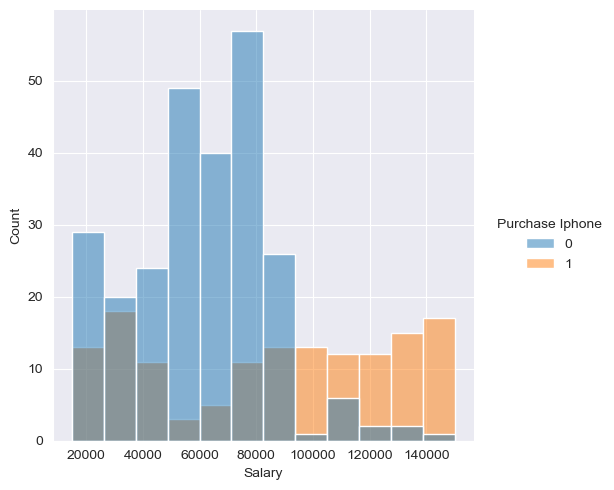

In [29]:
sns.displot(dataset, x='Salary', hue='Purchase Iphone')

In [36]:
def euclidean_distance(pt1, pt2):
    distance = np.sqrt(np.sum((pt1 - pt2) ** 2)) 
    return distance

In [37]:
a = np.array([3, 4])
b = np.array([5, 9])

In [40]:
euclidean_distance(a, b)

5.385164807134504

In [48]:
def KNN(X_train, X_test, Y_train, Y_test, k_val):
    y_hat = []
    for test_pt in X_test.to_numpy():
        distance = []
        for i in range(len(X_train)):
            distance.append(euclidean_distance(np.array(X_train.iloc[i]), test_pt))

        # Create a DataFrame to store distances
        distance_data = pd.DataFrame(data=distance, columns=['distance'], index=Y_train.index)

        # Sort by distance and get the k nearest neighbors
        k_neighbors_list = distance_data.sort_values(by=['distance'], axis=0)[:k_val]

        # Get the labels of the nearest neighbors
        labels = Y_train.loc[k_neighbors_list.index]

        # Calculate the mode of the labels with keepdims=True to avoid scalar issues
        voting = mode(labels, keepdims=True).mode[0]

        # Append the result to the y_hat list
        y_hat.append(voting)

    return y_hat


In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
y_hat_test = KNN(X_train, X_test, Y_train, Y_test, 5)

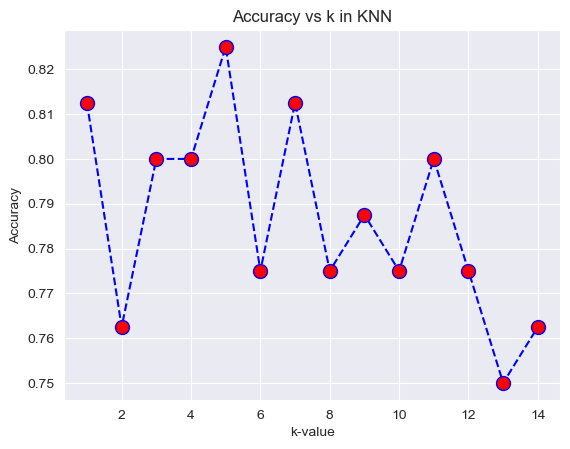

In [59]:
accuracy_values = []
for k in range(1, 15):  # k from 1 to 9
    y_hat_test = KNN(X_train, X_test, Y_train, Y_test, k_val=k)
    accuracy_values.append(accuracy_score(Y_test, y_hat_test))

# Adjust the range to match the length of accuracy_values (which is 9)
plt.plot(range(1, 15), accuracy_values, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', 
         markersize=10)
plt.xlabel('k-value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k in KNN')
plt.show()


0.825


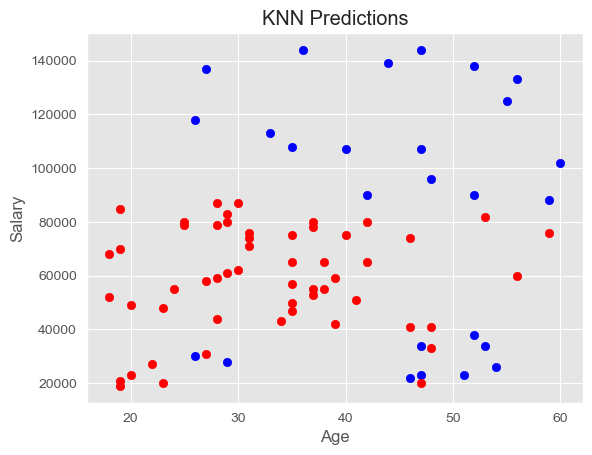

In [62]:
y_hat_test = KNN(X_train, X_test, Y_train, Y_test, 5)

print(accuracy_score(Y_test, y_hat_test))

for i in range(len(y_hat_test)):
    if y_hat_test[i] == 0:
        plt.scatter(X_test.iloc[i]['Age'], X_test.iloc[i]['Salary'], color='red')
    if y_hat_test[i] == 1:
        plt.scatter(X_test.iloc[i]['Age'], X_test.iloc[i]['Salary'], color='blue')
    plt.style.use('ggplot')
    plt.xlabel('Age')
    plt.ylabel('Salary')
    plt.title('KNN Predictions')


<Axes: xlabel='Age', ylabel='Salary'>

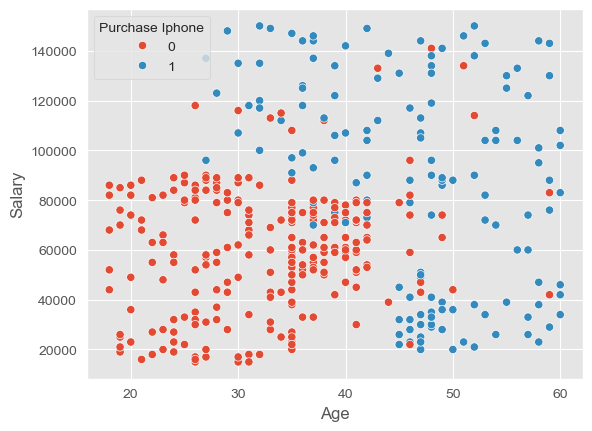

In [63]:
sns.scatterplot(data=dataset, x='Age', y='Salary', hue='Purchase Iphone')